# ExactReciprocal Variants for Morgan HHL circuits

In Jack Morgan's code for the MHM paper, the ``GrayCode'' strategy for eigenvalue inversion uses the Qiskit `ExactReciprocal` operation. 
The `ExactReciprocal` operation has three parameters:

* `num_state_qubits`
* `scaling`
* `neg_vals`

But, in Jack's code the `neg_vals` parameter is always set to `True` to support the possibility of negative eigenvalues, and the scalaing parameter is always set to 
$$
2\cdot 2^{num\_state\_qubits}
$$

Therefore, the only parameter that is actually used is `num_state_qubits`. 
We can generate the circuit for each value of `num_state_qubits`, and examine the transpiled circuits to understand how it works in the context of HHL.

In [2]:
# Imports and circuit definition

from qiskit import QuantumCircuit, QuantumRegister, transpile
from qiskit.circuit.library import ExactReciprocal
from qiskit_aer import Aer

def make_circuit(num_state_qubits, do_transpile=True):
    x_reg = QuantumRegister(num_state_qubits, 'x')
    a_reg = QuantumRegister(1, 'a')
    circuit = QuantumCircuit(a_reg, x_reg)
    exact_reciprocal = ExactReciprocal(num_state_qubits=num_state_qubits, scaling=2*2**-num_state_qubits, neg_vals=True)
    circuit.append(exact_reciprocal, x_reg[::-1] + [a_reg[0]])
    if do_transpile:
        simulator = Aer.get_backend('statevector_simulator')
        aer_circuit = transpile(circuit, simulator)
        return aer_circuit
    else:
        return circuit

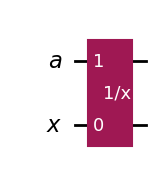

In [3]:
# ExactReciprocal for 1 state qubit

circuit = make_circuit(1,False)
circuit.draw('mpl')


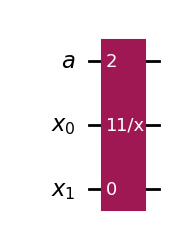

In [4]:
# ExactReciprocal for 2 state qubits

circuit = make_circuit(2,False)
circuit.draw('mpl')

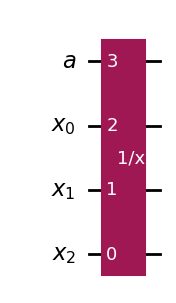

In [5]:
# ExactReciprocal for 3 state qubits

circuit = make_circuit(3,False)
circuit.draw('mpl')

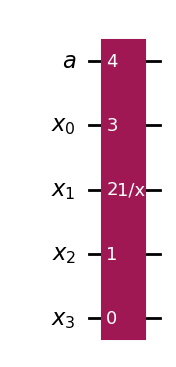

In [6]:
# ExactReciprocal for 4 state qubits

circuit = make_circuit(4,False)
circuit.draw('mpl')